## Modeling Earth's Orbit
Duncan Mazza

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Assignment:
Model the Earth's orbit around the Sun starting at the helion (represented by r_init)

In [4]:
pi = 3.1415926
params = Params(mass_e  = 5.972e24, # mass of the earth
                mass_s  = 1.989e30, # mass of the sun
                G       = 6.67408e-11, # gravitational constant
                r_init  = 1.47e11, # 149.6 million km
                t_end   = 32e6, # end of the simulation (1 year's worth of seconds)
                r_earth = 6.371e6, # for termination event (collision with Earth)
                r_sun   = 695.508e6, # for termination event (collision with Earth)
                v_init  = 30000,
                v_theta_init = pi/2,
                pos_theta_init = 0)

def make_system(params):
    unpack(params)
    
    rx, ry = pol2cart(pos_theta_init, r_init)
    vx, vy = pol2cart(v_theta_init, v_init)
    init = State(rx = rx, ry = ry, vx = vx, vy = vy)
    print('Initial velocity in the vertical Y direction is:', vy, 'm/s')
    return System(params, init=init)

system = make_system(params)

Initial velocity in the vertical Y direction is: 29999.99999999999 m/s


,values
mass_e,5.972e+24
mass_s,1.989e+30
G,6.67408e-11
r_init,1.47e+11
t_end,3.2e+07
r_earth,6.371e+06
r_sun,6.95508e+08
v_init,30000
v_theta_init,1.5708
pos_theta_init,0


In [5]:
def slope_func2(state, t, system):
    unpack(system)
    
    rx, ry, vx, vy = state  
    radius = Vector(rx, ry)
    
    # law of universal gravitation with vectors
    force_magnitude = (G * mass_e * mass_s) / (radius.mag ** 2)
    # Gravitational force is in opposite direction of radius vector,
    # therefore the direction of the force is the negative of the radius
    neg_radius = Vector(-rx, -ry)
    unit_force_direction = neg_radius.hat()
    force_x = unit_force_direction.x * force_magnitude
    force_y = unit_force_direction.y * force_magnitude
    
    # X and Y velocities
    dxdt = vx 
    dydt = vy 
    # F = ma, therefore a = F / m
    dvxdt = force_x / mass_e
    dvydt = force_y / mass_e
    return dxdt, dydt, dvxdt, dvydt

def event_func(state, t, system):
    unpack(system)
    rx, ry, vx, vy = state
    radius = Vector(rx, ry)
    r_final = (r_earth + r_sun)/2
    return radius.mag - r_final
    
results, details = run_ode_solver(system, slope_func2, events = event_func, max_step=1e4)
details.message

'The solver successfully reached the end of the integration interval.'

In [6]:
results;

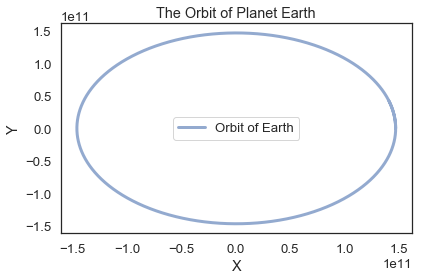

In [7]:
def plot_position(results):
    plot(results.rx, results.ry, label='Orbit of Earth')
    decorate(xlabel='X',
             ylabel='Y')

plot_position(results)

decorate(title = 'The Orbit of Planet Earth')

In [ ]:
plot(results.rx)
plot(results.ry)